In [1]:
import sys
sys.path.append("../../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from gempy.core.data import Grid

## The Grid Class

The grid class will interact with the rest of data classes and grid subclases. Its main purpose is to feed coordinates XYZ to the interpolator.

In [3]:
grid = Grid()

The most important attribute of Grid is `values` (and `values_r` which are the values rescaled) which are the 3D points in space that kriging will be evaluated on. This array will be feed by "grid types" on a **composition** relation with Grid:

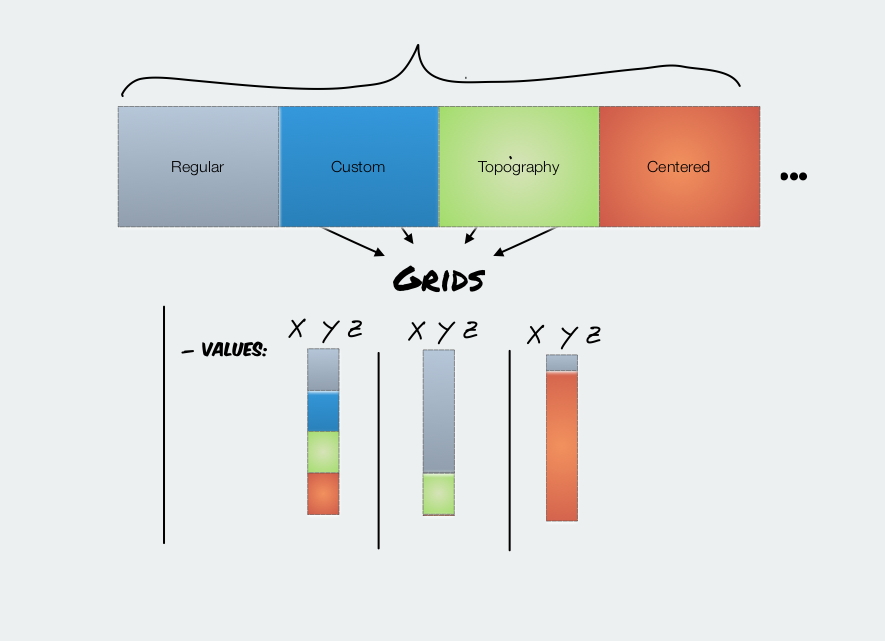

In [4]:
grid.values, grid.values_r

(array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64))

At the moment of writing this tutorial, there is 5 grid types. The number of grid types is scalable and down the road we aim to connect other grid packages (like Discretize) as an extra Grid type

In [5]:
grid.grid_types

array(['regular', 'custom', 'topography', 'sections', 'centered'],
      dtype='<U10')

Each grid vill containt its own `values` attribute as well as other methods to manipulate them depending on the type of grid.

In [6]:
grid.regular_grid.values

array([], shape=(0, 3), dtype=float64)

We can see what grids are activated (i.e. they are going to be interpolated and therefore will live on `Grid().values`) by:

In [7]:
grid.active_grids

array([ True, False, False, False, False])

By default only the *regular grid* is active. However, since the regular grid is still empty `Grid().values` is empty too.

In [8]:
grid.values

array([], shape=(0, 3), dtype=float64)

The last important attribute of Grid is the length:

In [9]:
grid.length

array([0, 0, 0, 0, 0, 0])

Length gives back the interface indices between grids on the `Grid().values` attribute. This can be used after interpolation to know which interpolated values and coordinates correspond to each grid type. You can use the method get_grid_args to return the indices by name:

In [10]:
grid.get_grid_args('topography')

(0, 0)

By now all is a bit confusing because we have no values. Lets start adding values to the different grids:

### Regular grid

The `Grid` class have a bunch of methods to set each grid type and activate them.

In [11]:
help(grid.set_regular_grid)

Help on method set_regular_grid in module gempy.core.data:

set_regular_grid(*args, **kwargs) method of gempy.core.data.Grid instance
    Set a new regular grid and activate it.
    
    Args:
        extent (np.ndarray): [x_min, x_max, y_min, y_max, z_min, z_max]
        resolution (np.ndarray): [nx, ny, nz]
    
    RegularGrid Docs
     (inserted) 
    
    
        Class with the methods and properties to manage 3D regular grids where the model will be interpolated.
    
    
    
        Args:
    
            extent (np.ndarray):  [x_min, x_max, y_min, y_max, z_min, z_max]
    
            resolution (np.ndarray): [nx, ny, nz]
    
    
    
        Attributes:
    
            extent (np.ndarray):  [x_min, x_max, y_min, y_max, z_min, z_max]
    
            resolution (np.ndarray): [nx, ny, nz]
    
            values (np.ndarray): XYZ coordinates
    
            mask_topo (np.ndarray): TODO @elisa fill
    
            dx (float): size of the cells on x
    
            dy (fl

In [12]:
grid.set_regular_grid([0,100,0,100,-100,0], [20,20,20])

Now the regular grid object composed on `Grid` has been filled:

In [13]:
grid.regular_grid.values

array([[  2.5,   2.5, -97.5],
       [  2.5,   2.5, -92.5],
       [  2.5,   2.5, -87.5],
       ...,
       [ 97.5,  97.5, -12.5],
       [ 97.5,  97.5,  -7.5],
       [ 97.5,  97.5,  -2.5]])

And the regular grid has been set active (it was already active in any case):

In [14]:
grid.active_grids

array([ True, False, False, False, False])

Therefore the grid values will be equal to the regular grid:

In [15]:
grid.values

array([[  2.5,   2.5, -97.5],
       [  2.5,   2.5, -92.5],
       [  2.5,   2.5, -87.5],
       ...,
       [ 97.5,  97.5, -12.5],
       [ 97.5,  97.5,  -7.5],
       [ 97.5,  97.5,  -2.5]])

And the indices to extract the different arrays:

In [16]:
grid.length

array([   0, 8000, 8000, 8000, 8000, 8000])

### Custom grid

Completely free XYZ values.

In [17]:
grid.set_custom_grid(np.array([[1,2,3],
                               [4,5,6],
                               [7,8,9]]))

Again set_any_grid will create a grid and activate it. So now the compose object will contain values:

In [18]:
grid.custom_grid.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

and since is actived, will be add to the grid.values stack:

In [19]:
grid.active_grids

array([ True,  True, False, False, False])

In [20]:
grid.values.shape

(8003, 3)

We can still recover those values with `get_grid` or by getting the slicing args:

In [21]:
grid.get_grid('custom')

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [22]:
l0, l1 = grid.get_grid_args('custom')
l0, l1

(8000, 8003)

In [23]:
grid.values[l0:l1]

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

### Topography

Now we can set the topography. `gempy.core.grid_types.Topography` contains methods to create manual topographies as well as gdal for dealing with raster data. By default we will create a random topography:

[-20.   0.]


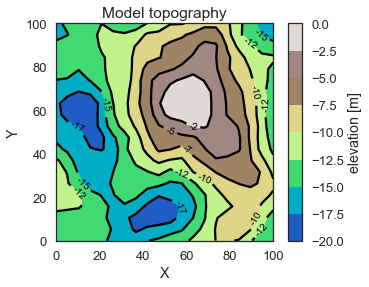

In [24]:
np.random.seed(55500)
grid.set_topography()

In [25]:
grid.active_grids

array([ True,  True,  True, False, False])

Now the grid values will contain both the regular grid and topography:

In [26]:
grid.values, grid.length

(array([[  2.5       ,   2.5       , -97.5       ],
        [  2.5       ,   2.5       , -92.5       ],
        [  2.5       ,   2.5       , -87.5       ],
        ...,
        [ 87.5       ,  97.5       , -13.79901206],
        [ 92.5       ,  97.5       , -16.03406726],
        [ 97.5       ,  97.5       , -16.21462612]]),
 array([   0, 8000, 8003, 8403, 8403, 8403]))

The topography args are got as follows:

In [27]:
l0, l1 = grid.get_grid_args('topography')
l0, l1

(8003, 8403)

Abd we can slice the values array as any other numpy array: 

In [28]:
grid.values[l0: l1]

array([[  2.5       ,   2.5       , -14.23224119],
       [  7.5       ,   2.5       , -14.52721785],
       [ 12.5       ,   2.5       , -13.65408006],
       ...,
       [ 87.5       ,  97.5       , -13.79901206],
       [ 92.5       ,  97.5       , -16.03406726],
       [ 97.5       ,  97.5       , -16.21462612]])

We can compare it to the topography.values:

In [29]:
grid.topography.values

array([[  2.5       ,   2.5       , -14.23224119],
       [  7.5       ,   2.5       , -14.52721785],
       [ 12.5       ,   2.5       , -13.65408006],
       ...,
       [ 87.5       ,  97.5       , -13.79901206],
       [ 92.5       ,  97.5       , -16.03406726],
       [ 97.5       ,  97.5       , -16.21462612]])

Now that we have more than one grid we can activate and deactivate any of them in real time:

In [30]:
grid.set_inactive('topography')
grid.set_inactive('regular')

array([False,  True, False, False, False])

Since now all grids are deactivated the values will be empty:

In [31]:
grid.values

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [32]:
grid.set_active('topography')

array([False,  True,  True, False, False])

In [33]:
grid.values, grid.values.shape

(array([[  1.        ,   2.        ,   3.        ],
        [  4.        ,   5.        ,   6.        ],
        [  7.        ,   8.        ,   9.        ],
        ...,
        [ 87.5       ,  97.5       , -13.79901206],
        [ 92.5       ,  97.5       , -16.03406726],
        [ 97.5       ,  97.5       , -16.21462612]]), (403, 3))

In [34]:
grid.set_active('regular')

array([ True,  True,  True, False, False])

In [35]:
grid.values, grid.values.shape

(array([[  2.5       ,   2.5       , -97.5       ],
        [  2.5       ,   2.5       , -92.5       ],
        [  2.5       ,   2.5       , -87.5       ],
        ...,
        [ 87.5       ,  97.5       , -13.79901206],
        [ 92.5       ,  97.5       , -16.03406726],
        [ 97.5       ,  97.5       , -16.21462612]]), (8403, 3))

### Centered Grid

This grid contains an irregular grid where the majority of voxels are centered around a value (or values). This type of grid is usually used to compute certain types of forward physiscs where the influence decreases with distance (e.g. gravity: Check tutorial 2.2-Cell-selection https://github.com/cgreaachen/gempy/blob/master/notebooks/tutorials/ch2-2-Cell_selection.ipynb)

In [36]:
grid.set_centered_grid(centers=np.array([[300, 0, 0],[0,0,0]]), resolution=[10,10,20], radio=100)

Resolution and radio create a geometric spaced kernel (blue dots) which will be use to create a grid around each of the center points (red dots):

Text(0.5, 0, 'Z Label')

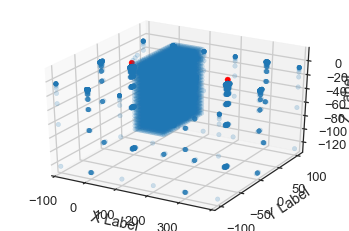

In [37]:
#%matplotlib qt5
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(grid.values[:, 0], grid.values[:,1], grid.values[:, 2], '.', alpha=.2)
ax.scatter(np.array([[300, 0, 0],[0,0,0]])[:, 0],
           np.array([[300, 0, 0],[0,0,0]])[:, 1],
           np.array([[300, 0, 0],[0,0,0]])[:, 2], c='r', alpha=1, s=30)


ax.set_xlim(-100, 400)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')



### Section Grid

This grid type has its own tutorial. See ch1-3b